# **A hybrid Deep Learning Model**

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10651 sha256=c5d954f9c91cd3df096043e81e6c7f70aba48006d1066b45c2ccc40e294740bf
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built MiniSom


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


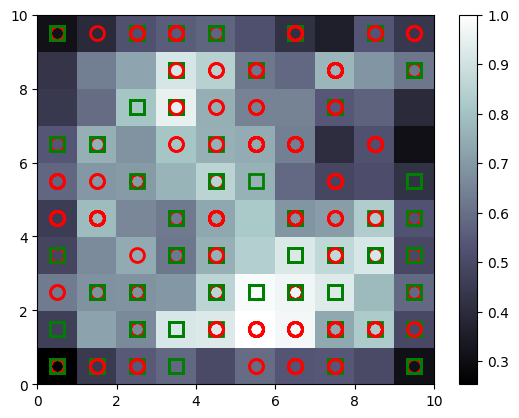

In [15]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [23]:
for i in range(som.get_weights().shape[0]):
    for j in range(som.get_weights().shape[1]):
        if len(mappings[(i, j)]) > 0:
            print(f"Neuron ({i}, {j}) has {len(mappings[(i, j)])} data points.")


Neuron (0, 0) has 22 data points.
Neuron (0, 1) has 1 data points.
Neuron (0, 2) has 2 data points.
Neuron (0, 3) has 2 data points.
Neuron (0, 4) has 10 data points.
Neuron (0, 5) has 6 data points.
Neuron (0, 6) has 3 data points.
Neuron (0, 9) has 9 data points.
Neuron (1, 0) has 8 data points.
Neuron (1, 2) has 6 data points.
Neuron (1, 4) has 17 data points.
Neuron (1, 5) has 2 data points.
Neuron (1, 6) has 11 data points.
Neuron (1, 9) has 1 data points.
Neuron (2, 0) has 6 data points.
Neuron (2, 1) has 17 data points.
Neuron (2, 2) has 13 data points.
Neuron (2, 3) has 1 data points.
Neuron (2, 5) has 10 data points.
Neuron (2, 7) has 7 data points.
Neuron (2, 9) has 8 data points.
Neuron (3, 0) has 3 data points.
Neuron (3, 1) has 7 data points.
Neuron (3, 3) has 12 data points.
Neuron (3, 4) has 10 data points.
Neuron (3, 6) has 2 data points.
Neuron (3, 7) has 8 data points.
Neuron (3, 8) has 4 data points.
Neuron (3, 9) has 16 data points.
Neuron (4, 1) has 5 data points.


## Finding the frauds


In [25]:
mappings = som.win_map(X)

selected_neurons = [(6, 9), (7, 3), (4, 3), (5, 6), (2, 2)]

frauds_list = [np.array(mappings[neuron]) for neuron in selected_neurons if len(mappings[neuron]) > 0]

if len(frauds_list) > 0:
    frauds = np.concatenate(frauds_list, axis=0)
    frauds = sc.inverse_transform(frauds)

    print('Fraud Customer IDs')
    for i in frauds[:, 0]:
        print(int(i))
else:
    print("No valid data points found in the selected neurons.")


Fraud Customer IDs
15599440
15597709
15642934
15636767
15615832
15594812
15681509
15591010
15701885
15648681
15587266
15567860
15689786
15670646
15666012
15625311
15676156
15604130
15740411
15668889
15686913
15590234
15642448
15620832
15624423
15604196
15715750
15621546
15704081
15723884
15636478
15689781
15735837
15778290
15585192
15591552
15701081
15671582
15611318
15722479
15730360
15649183
15751137
15664083
15690898
15704315
15622507
15640521
15591248
15598266
15593694
15785367
15703177
15659031
15733602
15642098
15693382
15571571
15725002
15752601
15632669
15644446
15803378
15714087
15672432
15730793
15788776
15767231
15746995
15762716
15725028
15768474
15764444
15731989
15671534
15771409
15814116
15777893
15662854
15745375
15662152
15623210
15734578
15570508
15795527
15641733
15660144
15664720
15627328
15800554
15617991
15696120
15638751
15641007
15606554
15786237
15767358
15671014
15579583
15740487
15811742
15702571
15622083
15715907
15768342
15748532
15689692
15788634


##Printing the Fraunch Clients

In [59]:
# print('Fraud Customer IDs')
# for i in frauds[:, 0]:
#   print(int(i))

#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [27]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [28]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [30]:
import tensorflow as tf
tf.__version__

'2.17.0'

## Initializing the ANN

In [31]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [32]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [33]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [35]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5872 - loss: 0.7076
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8435 - loss: 0.5082
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8680 - loss: 0.4111
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8496 - loss: 0.4070
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8730 - loss: 0.3559
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8378 - loss: 0.3995
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8289 - loss: 0.4060
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8183 - loss: 0.4169
Epoch 9/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8388 - loss: 0.3597
Epoch 10/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8544 - loss: 0.3337


## Predicting test set results

In [36]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [40]:
for customer_id, prediction in y_pred:
    print(f"Customer ID: {int(customer_id)}, Predicted Fraud Probability: {prediction:.4f}")


Customer ID: 15682540, Predicted Fraud Probability: 0.0018
Customer ID: 15772329, Predicted Fraud Probability: 0.0019
Customer ID: 15793317, Predicted Fraud Probability: 0.0019
Customer ID: 15658504, Predicted Fraud Probability: 0.0019
Customer ID: 15720529, Predicted Fraud Probability: 0.0021
Customer ID: 15663942, Predicted Fraud Probability: 0.0025
Customer ID: 15644453, Predicted Fraud Probability: 0.0026
Customer ID: 15599535, Predicted Fraud Probability: 0.0026
Customer ID: 15643574, Predicted Fraud Probability: 0.0027
Customer ID: 15692430, Predicted Fraud Probability: 0.0028
Customer ID: 15600027, Predicted Fraud Probability: 0.0030
Customer ID: 15599152, Predicted Fraud Probability: 0.0031
Customer ID: 15593178, Predicted Fraud Probability: 0.0031
Customer ID: 15649101, Predicted Fraud Probability: 0.0031
Customer ID: 15642001, Predicted Fraud Probability: 0.0031
Customer ID: 15731586, Predicted Fraud Probability: 0.0038
Customer ID: 15694666, Predicted Fraud Probability: 0.00

In [42]:
# print(y_pred)

In [60]:
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8434782608695652


In [61]:
thresholds = [0.1, 0.2, 0.5]
for threshold in thresholds:
    y_pred_classes = (y_pred[:, 1] >= threshold).astype(int)
    accuracy = accuracy_score(y_true, y_pred_classes)
    print(f"Threshold: {threshold}, Accuracy: {accuracy}")


Threshold: 0.1, Accuracy: 0.4492753623188406
Threshold: 0.2, Accuracy: 0.6014492753623188
Threshold: 0.5, Accuracy: 0.8434782608695652
